In [1]:
import hypernetx as hnx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import warnings 
warnings.simplefilter('ignore')

from collections import defaultdict
from hypernetx.drawing import draw_incidence
from hypernetx.drawing import draw_bipartite

from importlib import reload; reload(draw_incidence); reload(draw_bipartite)

<module 'hypernetx.drawing.draw_bipartite' from '/Users/yunj738/projects/hypernetx/hypernetx/drawing/draw_bipartite.py'>

# Data

The data in several of our notebooks are taken from the jean.dat dataset available from the Stanford GraphBase at https://www-cs-faculty.stanford.edu/~knuth/sgb.html. This data gives character scene incidence information from the novel Les Miserables by Victor Hugo.

In [2]:
scenes = {
    0: ('FN', 'TH'),
    1: ('TH', 'JV'),
    2: ('BM', 'FN', 'JA'),
    3: ('JV', 'JU', 'CH', 'BM'),
    4: ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    5: ('TH', 'GP'),
    6: ('GP', 'MP'),
    7: ('MA', 'GP')
}

H = hnx.Hypergraph(scenes)

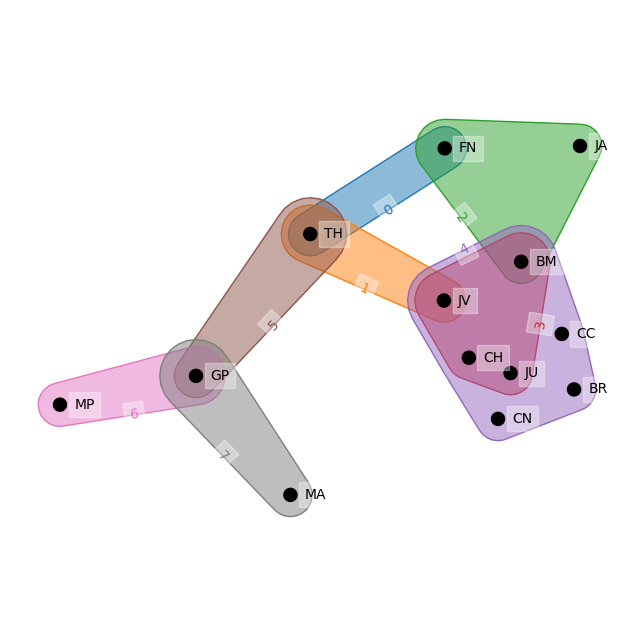

In [3]:
hnx.drawing.draw(H)

# Advanced Visualization Parameters

This is a helper function to load the three main visualizations with the hypergraph and keyword arguments as the input. You can see that all of these visualizations can be updated using a single kwargs input.

In [4]:
def draw_each(H, **kwargs):
    plt.figure(figsize=(18, 6))

    plt.subplot(131)
    plt.title('Euler Style')
    hnx.draw(H, **kwargs)
    
    plt.subplot(132)
    plt.title('Two-Column Style (new)')
    draw_bipartite.draw_bipartite_using_euler(H, **kwargs)
    
    plt.subplot(133)
    plt.title('Incidence/UpSet Style (new)')
    draw_incidence.draw_incidence_upset(
        H, edge_labels_on_axis=False,
        **kwargs
    )

    plt.show()

## Label options
For anything but trivially small hypergraphs, the number of items in a collapsed element can be large, causing the label to be very long. You can set `with_node_counts=True` to mitigate this. This will replace node labels with counts where there is more than one element at that node.

The collapsed nodes from above have been replaced with `x3` and `x2`, and the rest of the labels have disappeared.

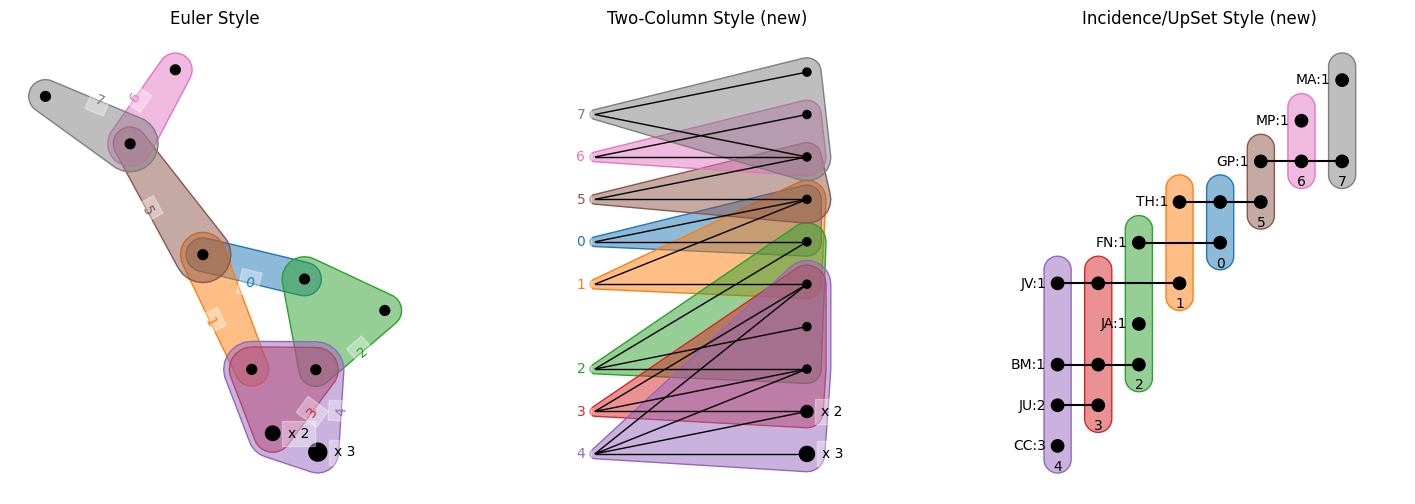

In [5]:
draw_each(H.collapse_nodes(use_counts=True, use_uids=['CC', 'JU']), with_node_counts=True)

Similarly, hyperedges can be collapsed and relabeled. We will use the dual to illustrate this.

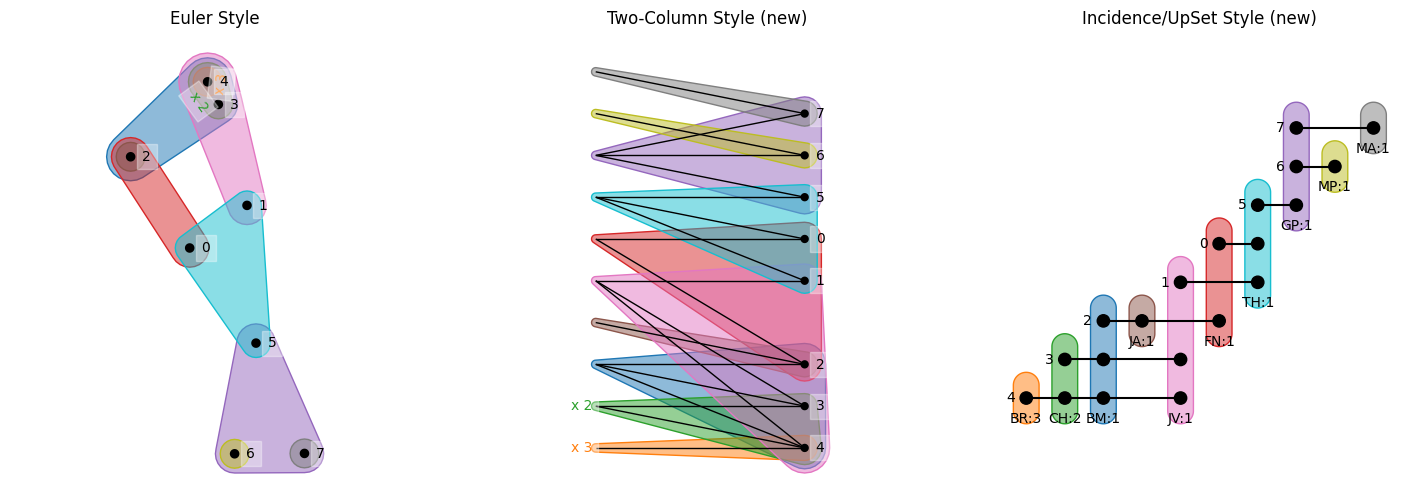

In [6]:
draw_each(H.dual().collapse_edges(use_counts=True), with_edge_counts=True)

### Disabling labels
If edge or node labels are a distraction, they can be turned off completely by passing in `with_edge_labels=False` or `with_node_labels=False`

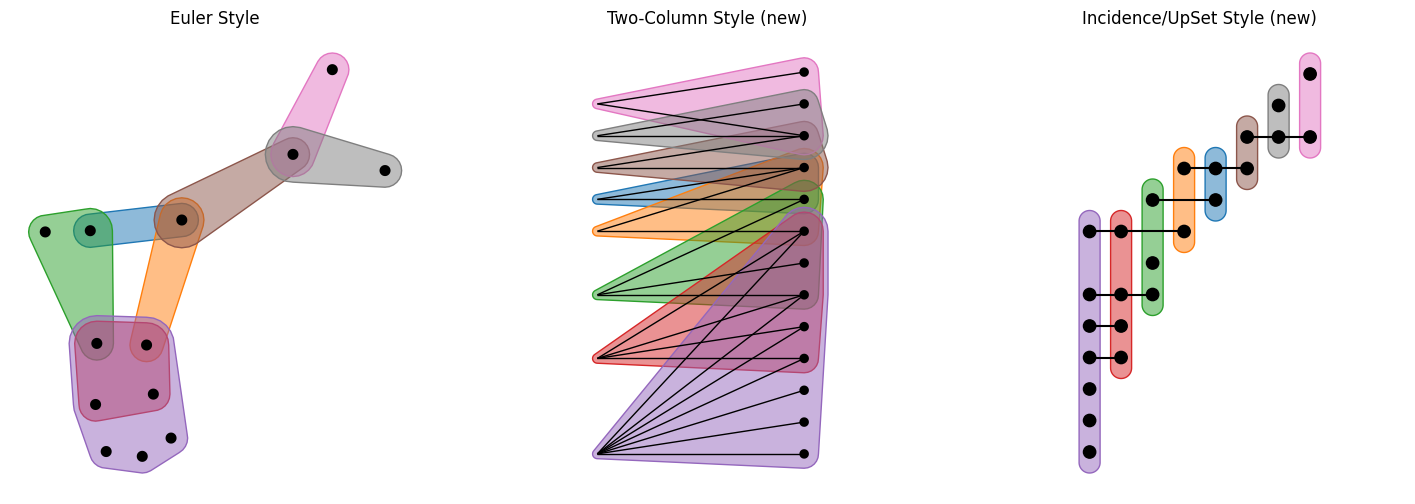

In [7]:
draw_each(H, with_edge_labels=False, with_node_labels=False)

## Colors
Properties like colors and thickness can be adjusted. This allows style parameters to be passed directly to the corresponding Matplotlib function. The mapping is as follows:
* `edges_kwargs` => `matplotlib.collections.PolyCollection`
* `nodes_kwargs` => `matplotlib.collections.PolyCollection`
* `edge_labels_kwargs` => `matplotlib.annotate`
* `node_labels_kwargs` => `matplotlib.annotate`

By default, we cycle through one of 10 unique colors for edges and black for nodes. This can be overridden using the `edges_kwargs` parameter and the `nodes_kwargs` parameter. 

Pass a **string** to set a specific color for all nodes/edges. Pass a **array**, **dictionary**, or a **function** using matplotlib colors to configure individual colors of nodes/edges. 

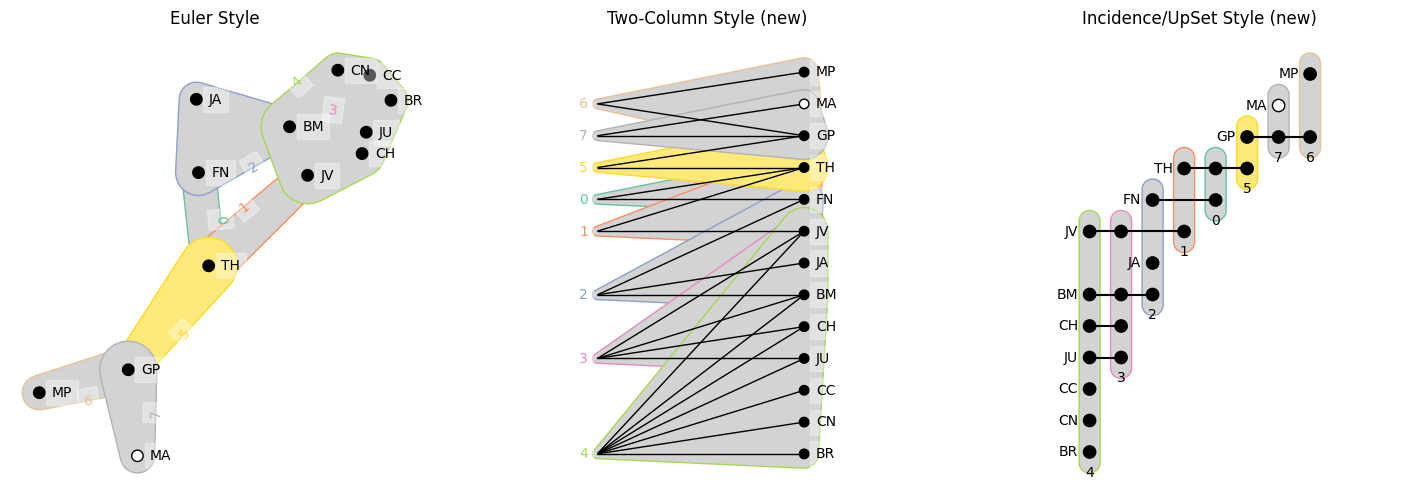

In [8]:
draw_each(
    H,
    nodes_kwargs={
        'facecolors': lambda n: 'white' if n=='MA' else 'black',
        'edgecolors': 'black'
    },
    edges_kwargs={
        'facecolors': ['#ffe979' if e==5 else '#d3d3d3' for e in H.edges()],
        'edgecolors': {e: plt.cm.Set2(e) for e in H.edges()},
        'linewidths': 2
    }
)

### String

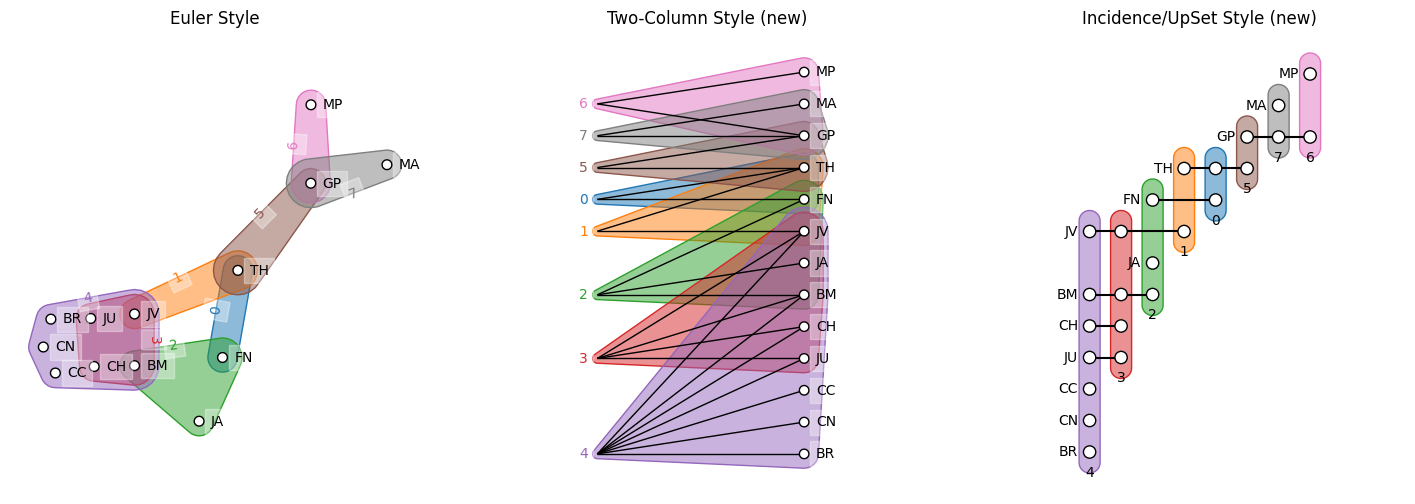

In [9]:
draw_each(
    H,
    nodes_kwargs={
        'facecolors': 'white',
        'edgecolors': 'black'
    }
)

In this example, we are using collapsed nodes using `collapse_nodes` to show edge color changes using a string.

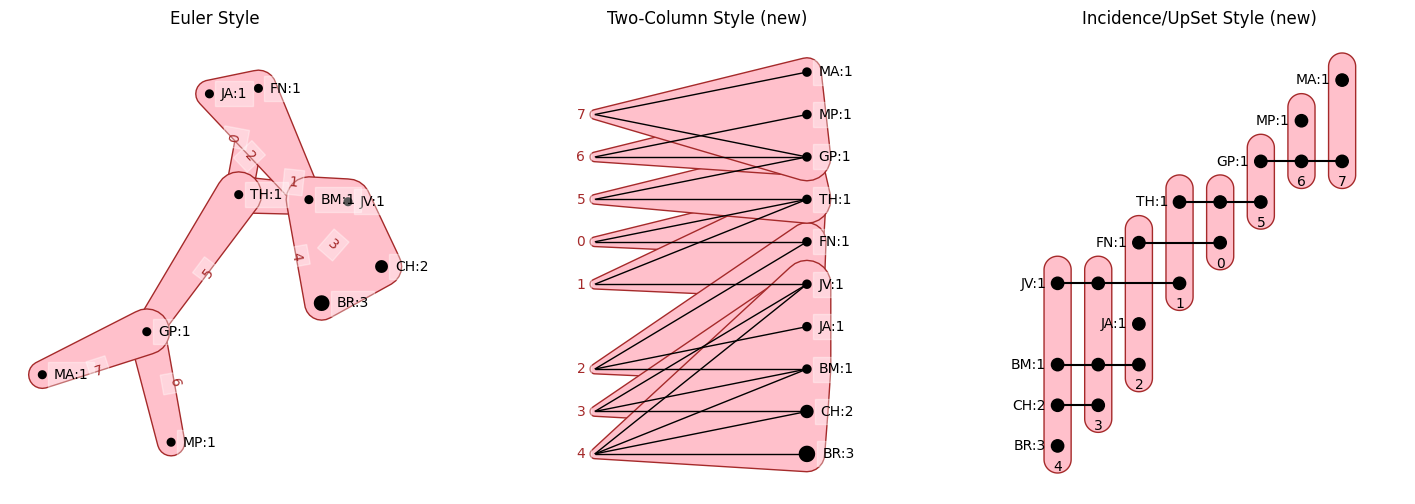

In [10]:
H_collapsed = H.collapse_nodes(use_counts=True)

draw_each(H_collapsed,
    edges_kwargs={
        'linewidths': 2,
        'edgecolors': 'brown',
        'facecolors': 'pink'
    }
)

### Array

In this example, we color the collapsed nodes red that are larger than 1 node.

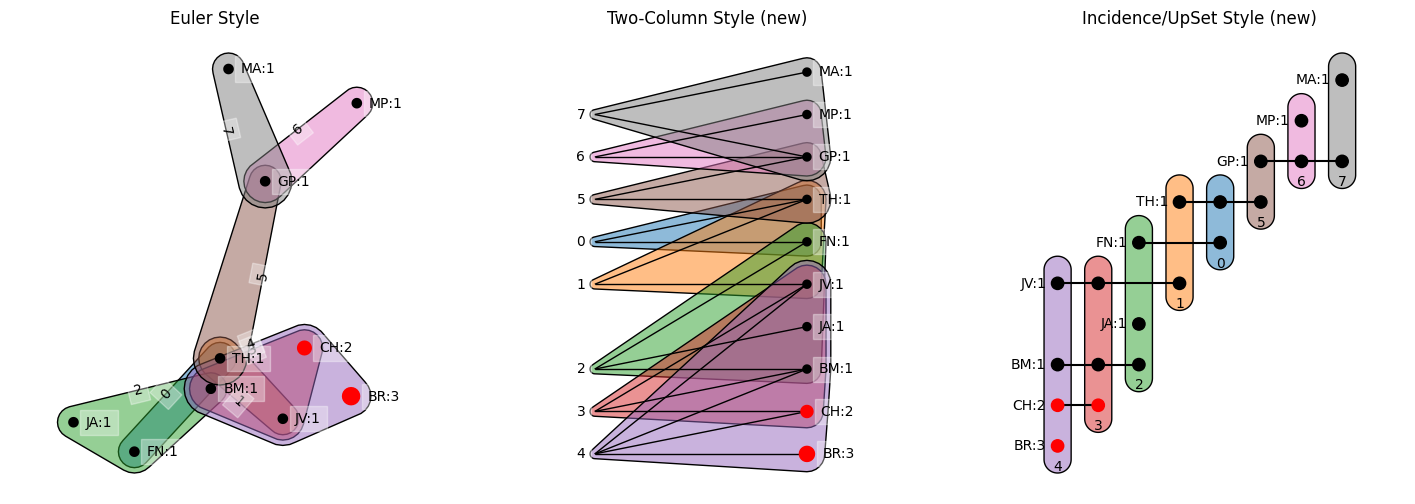

In [13]:
from hypernetx.drawing.util import get_collapsed_size
H_collapsed = H.collapse_nodes(use_counts=True)

colors = [
    'red' if get_collapsed_size(v) > 1 else 'black'
    for v in H_collapsed
]

draw_each(
    H_collapsed,
    edges_kwargs={
     'edgecolors': 'black'
    },
    nodes_kwargs={
     'facecolors': colors
    }
)

We color edges by its normalized size using the blues color palette.

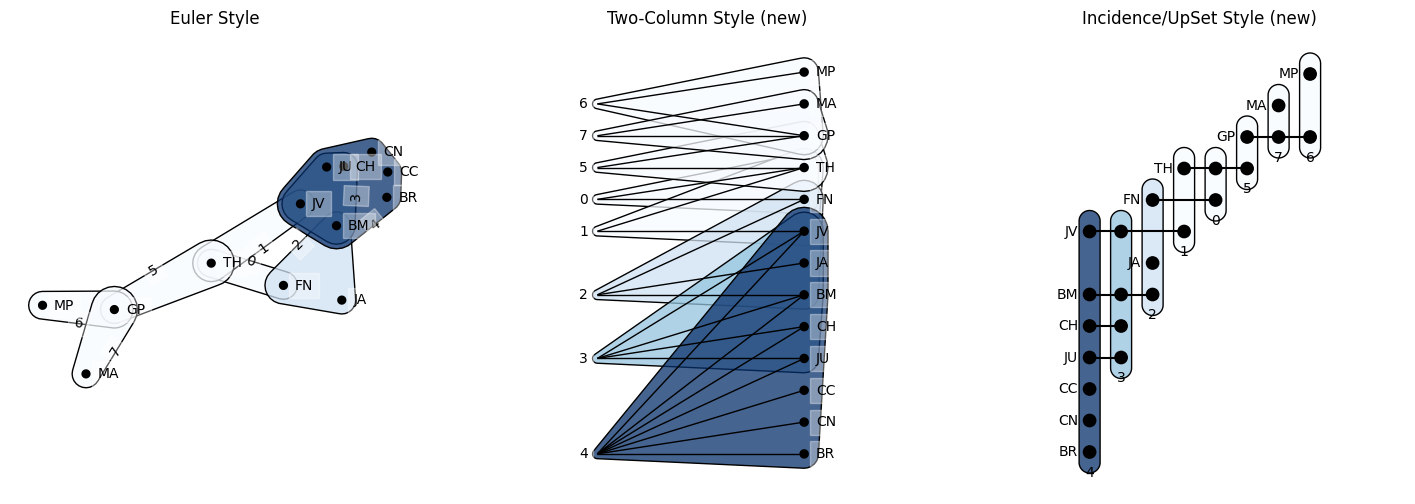

In [14]:
cmap = plt.cm.Blues
alpha = .75

sizes = np.array([H.size(e) for e in H.edges()])
norm = plt.Normalize(sizes.min(), sizes.max())

draw_each(H,
    edges_kwargs={
        'facecolors': cmap(norm(sizes))*(1, 1, 1, alpha),
        'edgecolors': 'black',
        'linewidths': 2
    }
)

### Dictionary

Here, we set the node fill as white if 'A' is included in the nodes, and black otherwise.

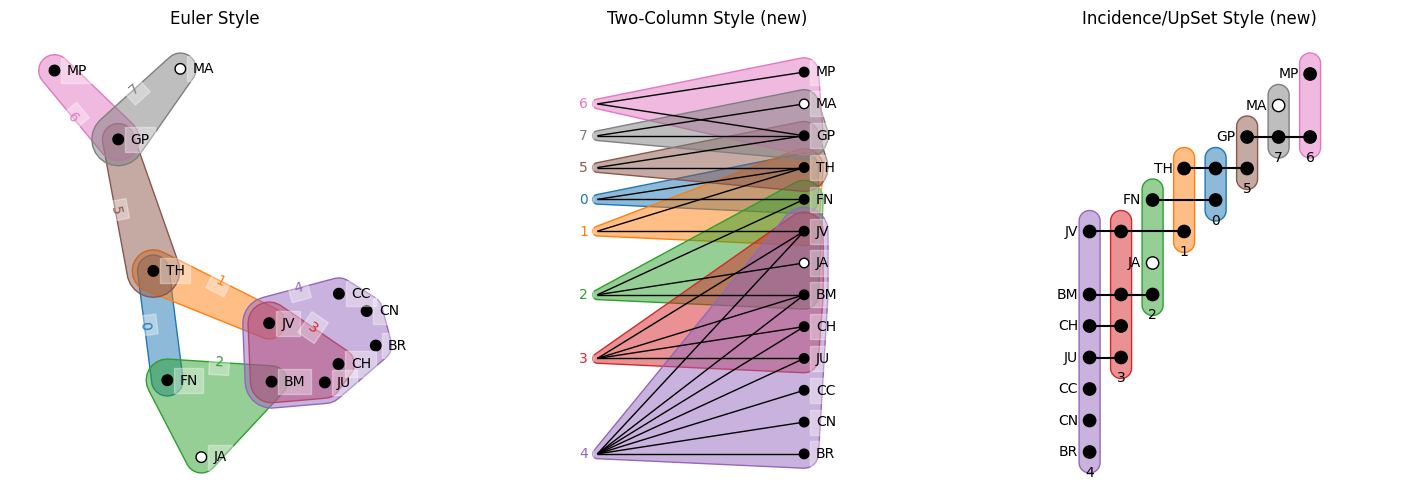

In [11]:
draw_each(
    H,
    nodes_kwargs={
        'facecolors': lambda n: 'white' if 'A' in n else 'black',
        'edgecolors': 'black'
    }
)

Using a color palette from the Matplotlib library, we assign colors for edge fill depending on its size.

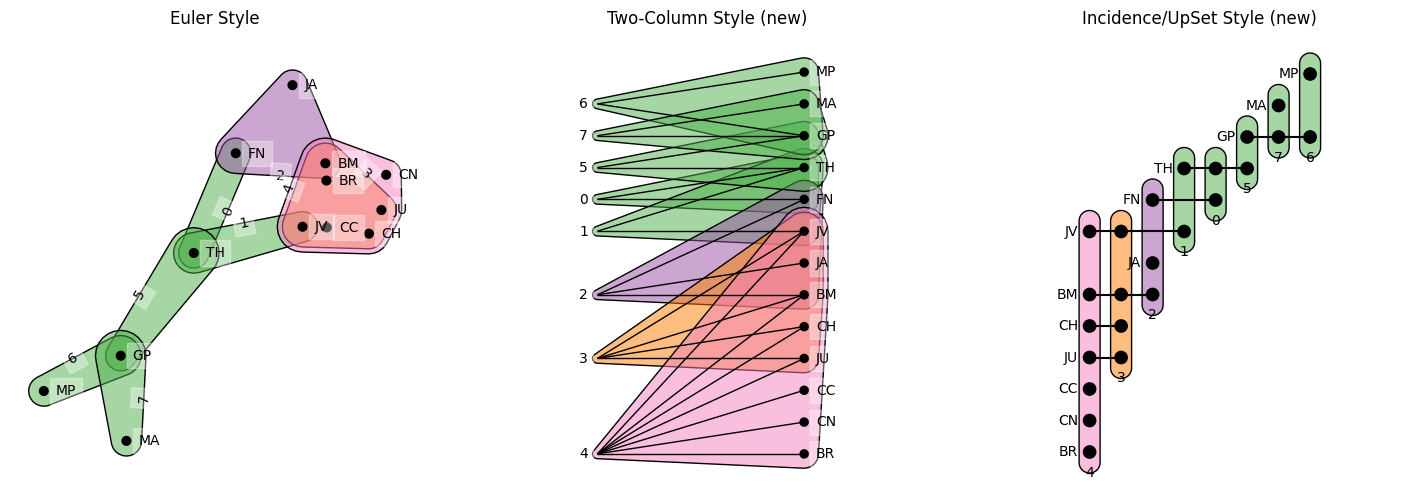

In [12]:
draw_each(H,
    edges_kwargs={
        'linewidths': 2,
        'edgecolors': 'black',
        'facecolors': {e: plt.cm.Set1(H.size(e)) + np.array([0, 0, 0, -.5]) for e in H.edges()}
    }
)

### Function

Using a function, we color nodes with the letter 'J' included as white and others as black.

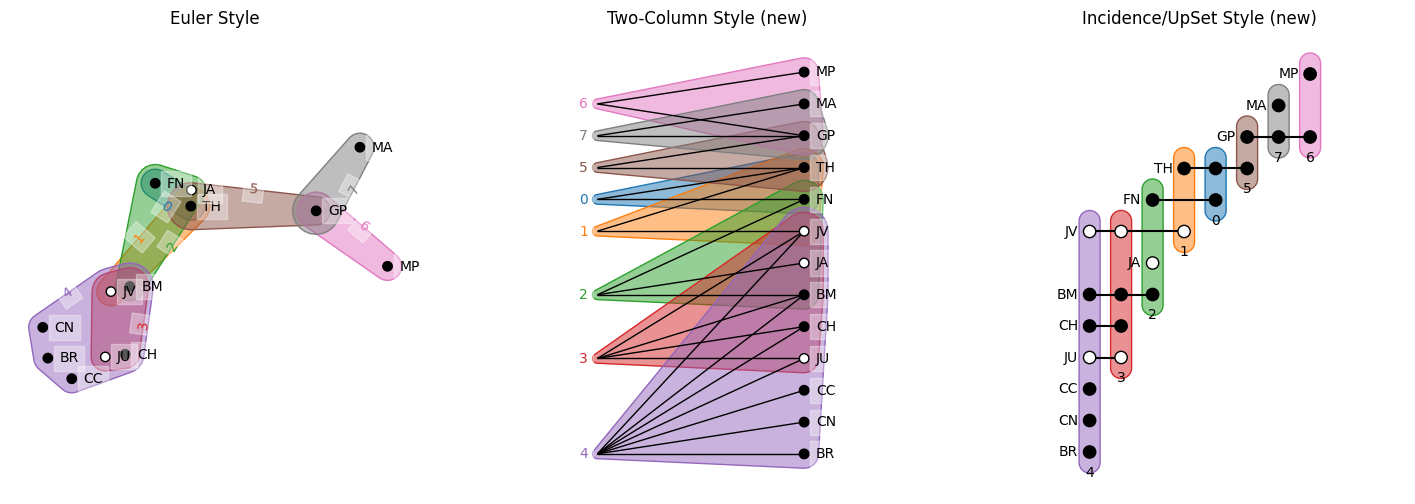

In [15]:
draw_each(
    H,
    nodes_kwargs={
        'facecolors': lambda n: 'white' if 'J' in n else 'black',
        'edgecolors': 'black'
    }
)

Set edge colors by passing in a new color palette from the Matplotlib library.

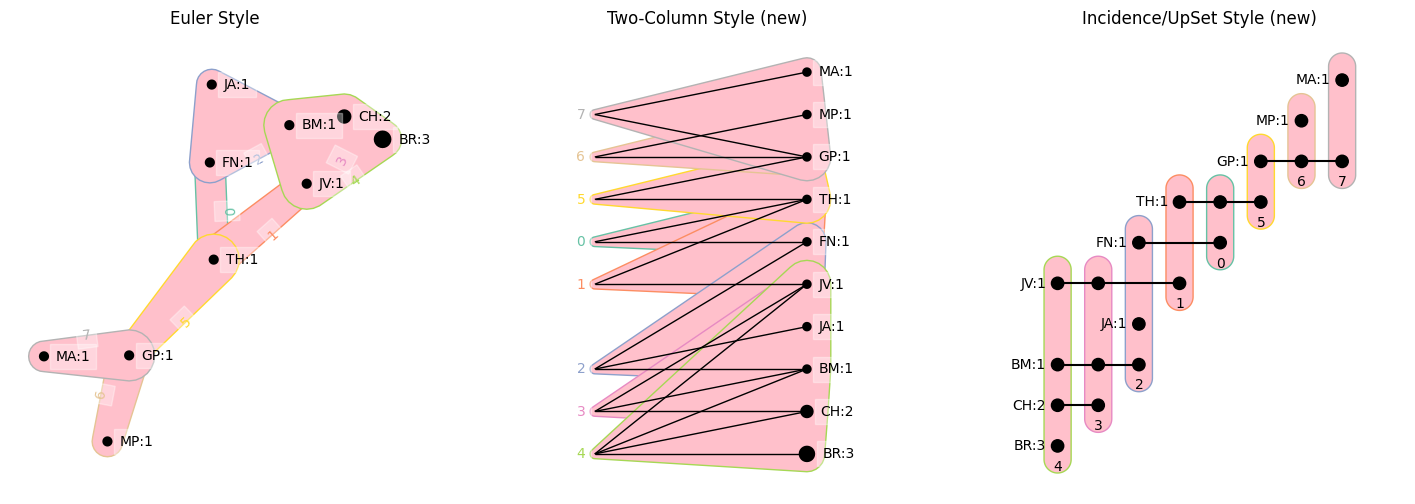

In [16]:
draw_each(H_collapsed,
    edges_kwargs={
        'linewidths': 2,
        'edgecolors': lambda e: plt.cm.Set2(e),
        'facecolors': 'pink'
    }
)

## Font size
Fontsize can be set with the `node_labels_kwargs` and `edge_labels_kwargs` parameters. Font sizes of all nodes/edges can be modified using a **string**. Individual colors can be set by passing in an **array** of font values, a **dictionary** mapping nodes/edges to values, or a **function** setting values with nodes/edges.

### String

Here we set the nodes font size at 18 to make the nodes appear large for illustrative purposes.

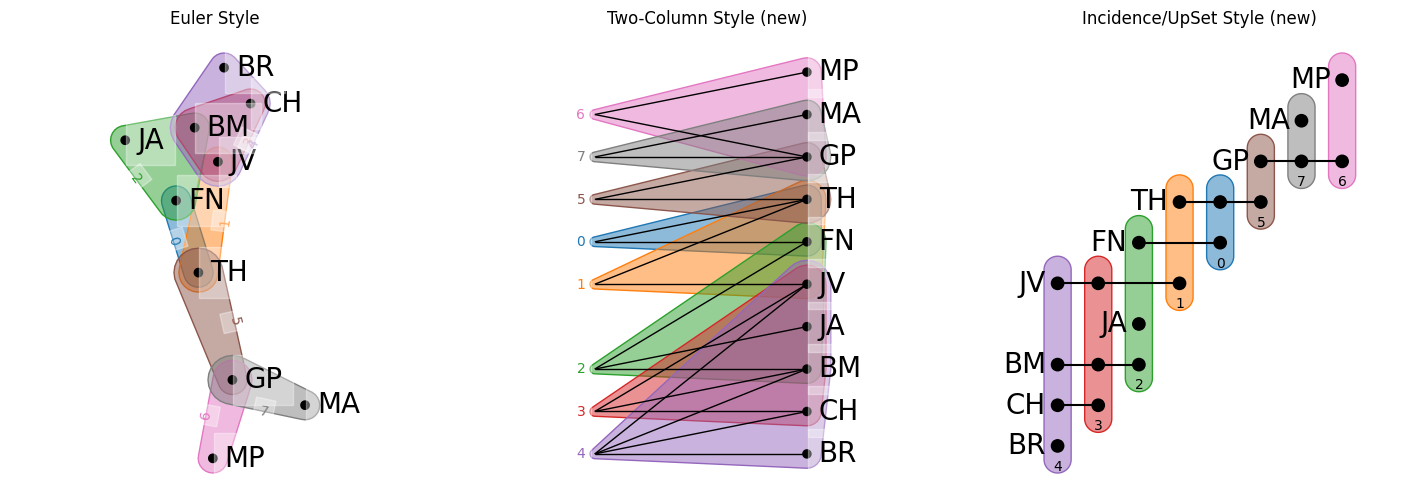

In [42]:
draw_each(H.collapse_nodes(),
    node_labels_kwargs={
        'fontsize': 20
    }
)

### Array

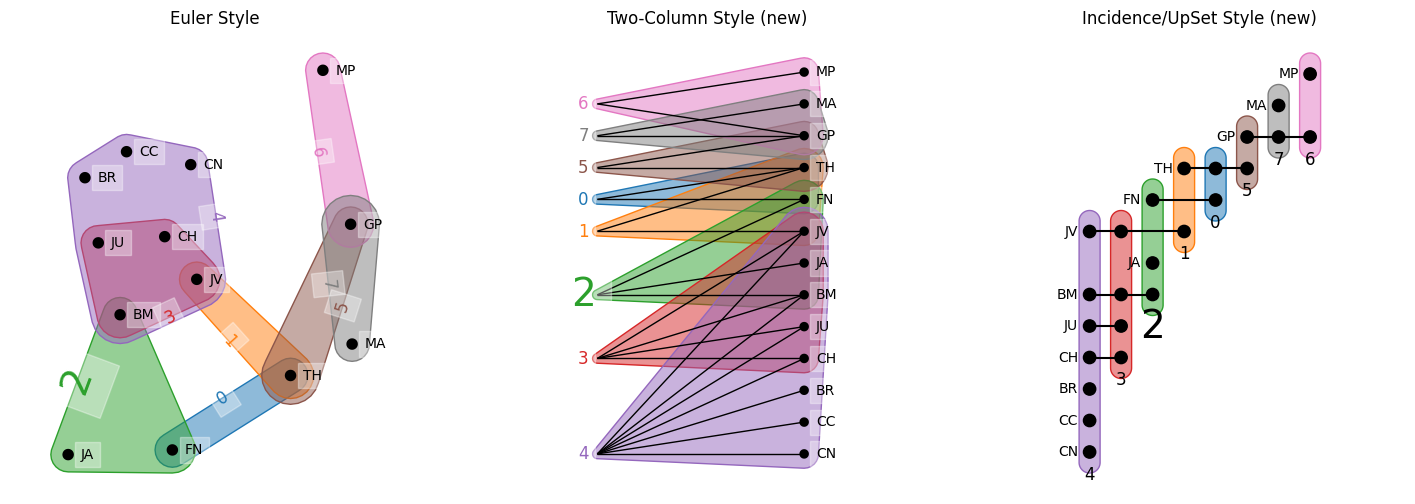

In [56]:
draw_each(H, 
    edge_labels_kwargs={'fontsize': [28 if v==2 else 12 for v in H.edges()]}
)

TypeError: list indices must be integers or slices, not str

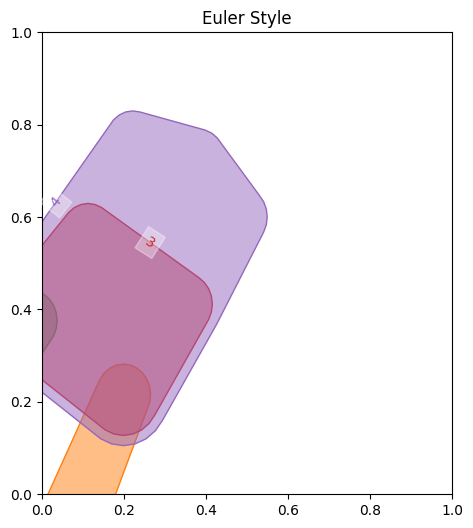

In [17]:
# array format not working for setting node font colors
draw_each(H, 
    node_labels_kwargs={'fontsize': [28 if v=='CC' else 12 for v in H]}
)

### Dictionary

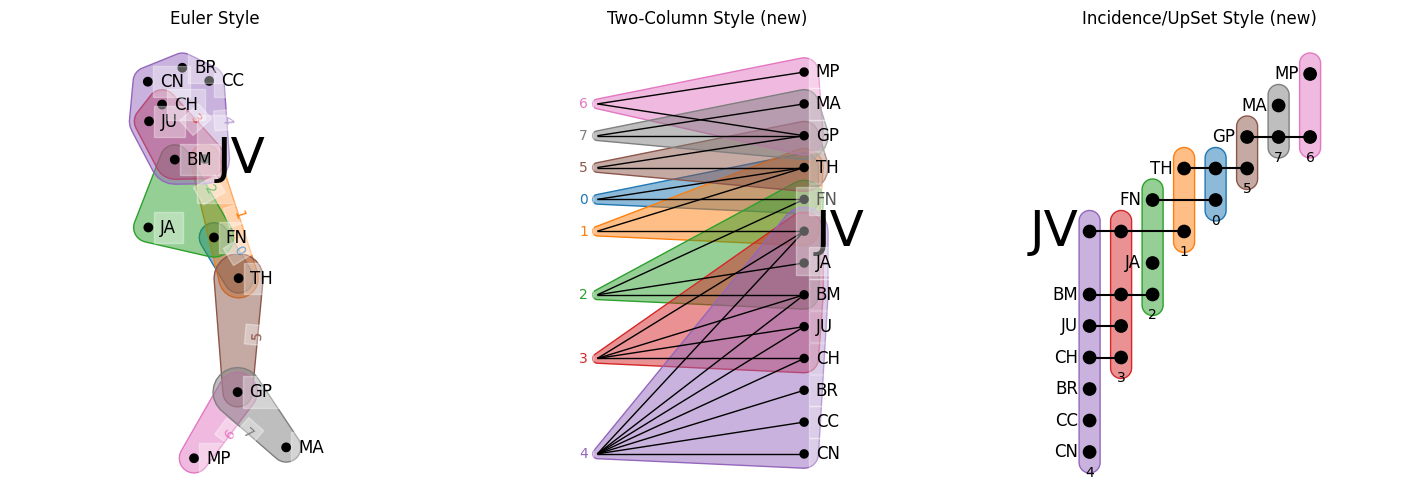

In [35]:
draw_each(H,
    node_labels_kwargs={
        'fontsize': {
            v: 36 if v == 'JV' else 12 for v in H
        }
    }
)

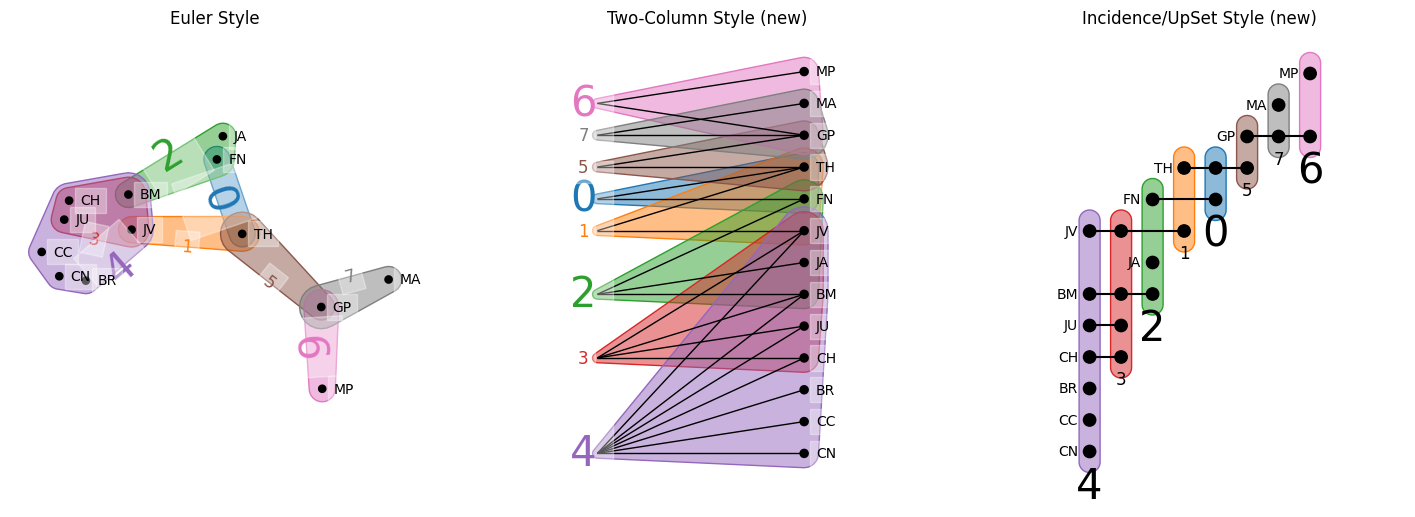

In [36]:
draw_each(H,
    edge_labels_kwargs={
        'fontsize': {
            v: 30 if v%2 == 0 else 12 for v in H.edges()
        }
    })

### Function

TypeError: float() argument must be a string or a real number, not 'function'

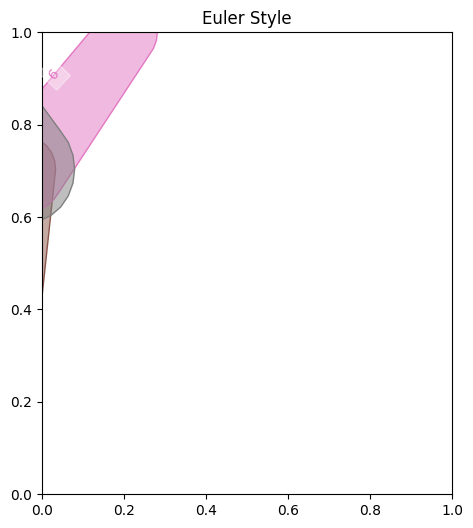

In [22]:
# Error using function for setting node label font sizes
draw_each(H,
    node_labels_kwargs={
        'fontsize': lambda x: 24 if x=='TH' else 14
    })

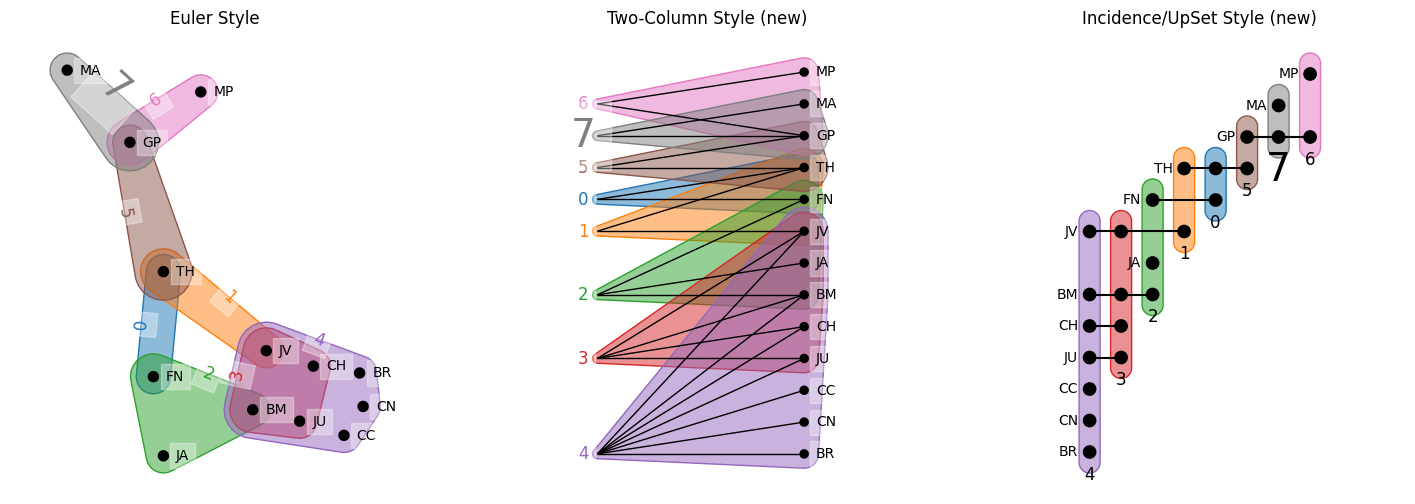

In [24]:
draw_each(H,
    edge_labels_kwargs={
        'fontsize': lambda x: 28 if x==7 else 12
    })

### Font color
Font color can also be set using the `node_labels_kwargs` and `edge_labels_kwargs` parameters by passing in values to `color`. Font color can also be individually set by passing in a **string** for setting the attribute for all nodes/edges and **array**, **dictionary**, or a **function** for setting individual font colors.

Setting font color attributes has been combined with font size for appearance.

### String

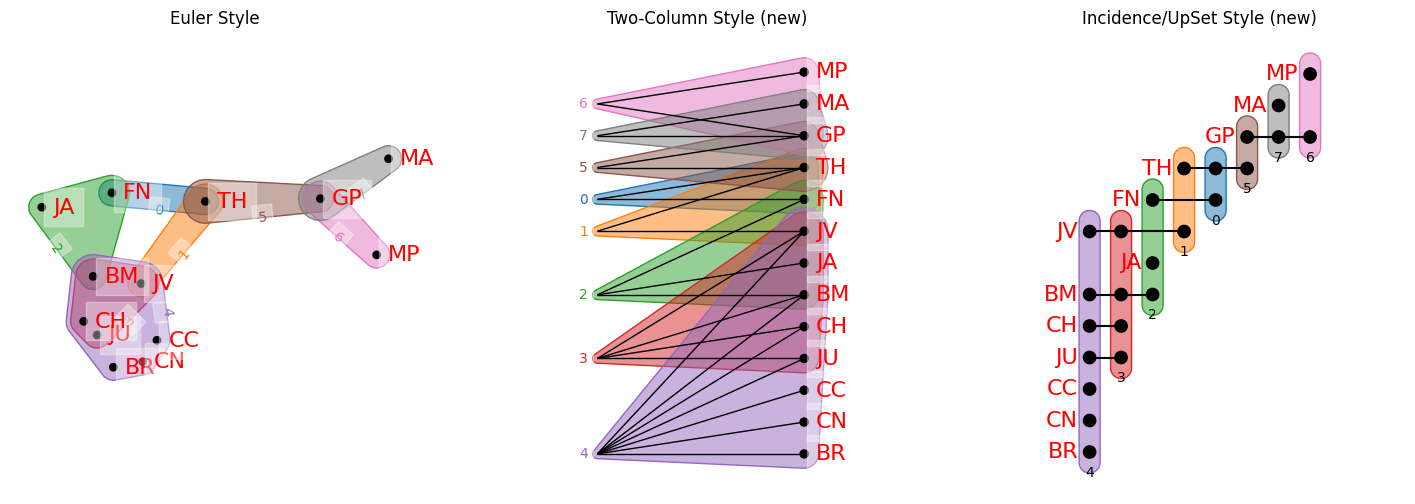

In [40]:
draw_each(H, 
    node_labels_kwargs={
        'color': 'red', 
        'fontsize': 16
    })

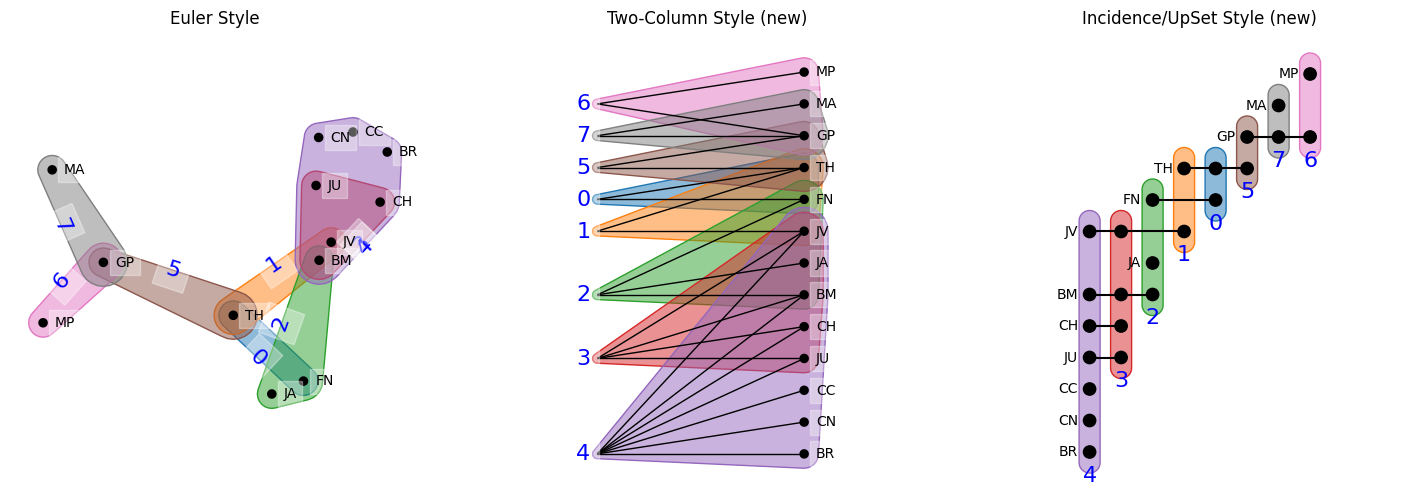

In [41]:
draw_each(H, 
    edge_labels_kwargs={
        'color': 'blue'
        'fontsize': 16,
    })

### Array

TypeError: list indices must be integers or slices, not str

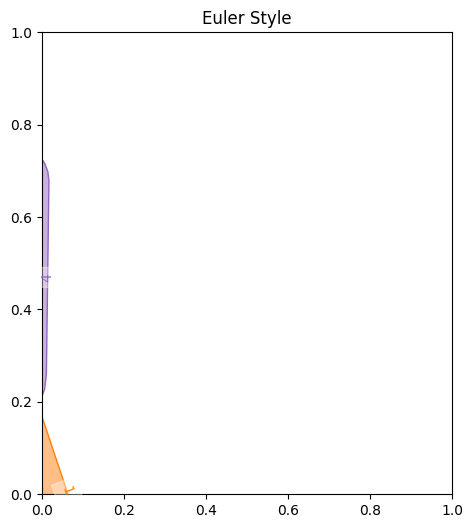

In [25]:
# Error setting node label font colors using an array
draw_each(H, 
    node_labels_kwargs={
        'color': [
            'red' if 'C' in v else 'darkgrey' for v in H    
        ]
    })

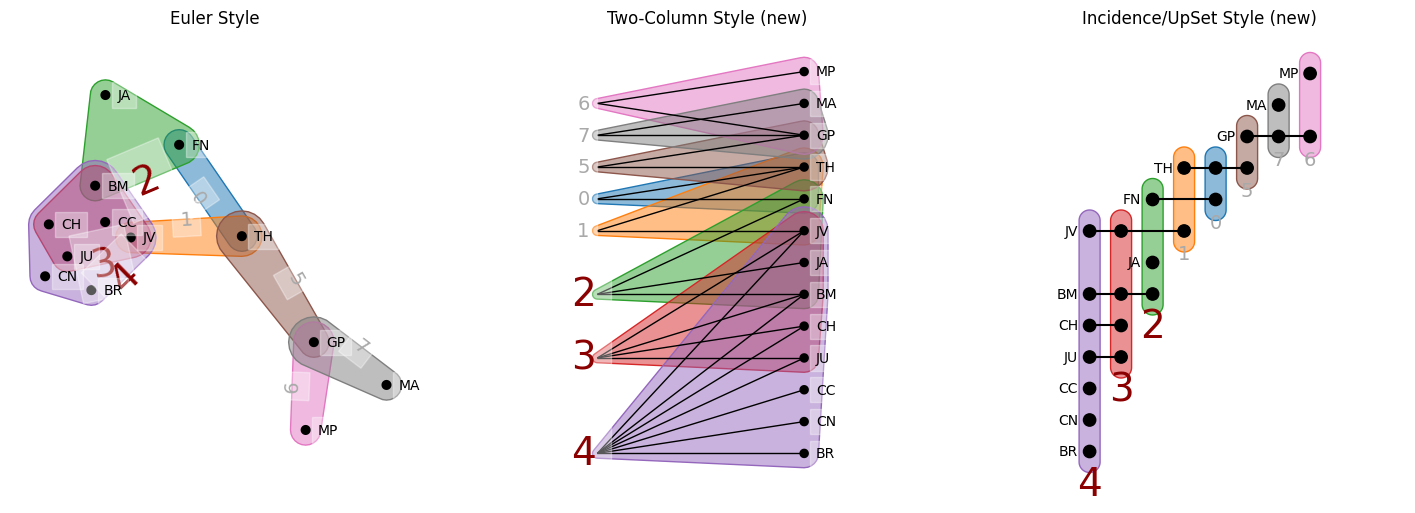

In [37]:
draw_each(H, 
    edge_labels_kwargs={
        'fontsize': [28 if H.size(v) > 2 else 14 for v in H.edges()],
        'color': [
            'darkred' if H.size(v) > 2 else 'darkgrey' for v in H.edges()
        ]
    })

### Dictionary

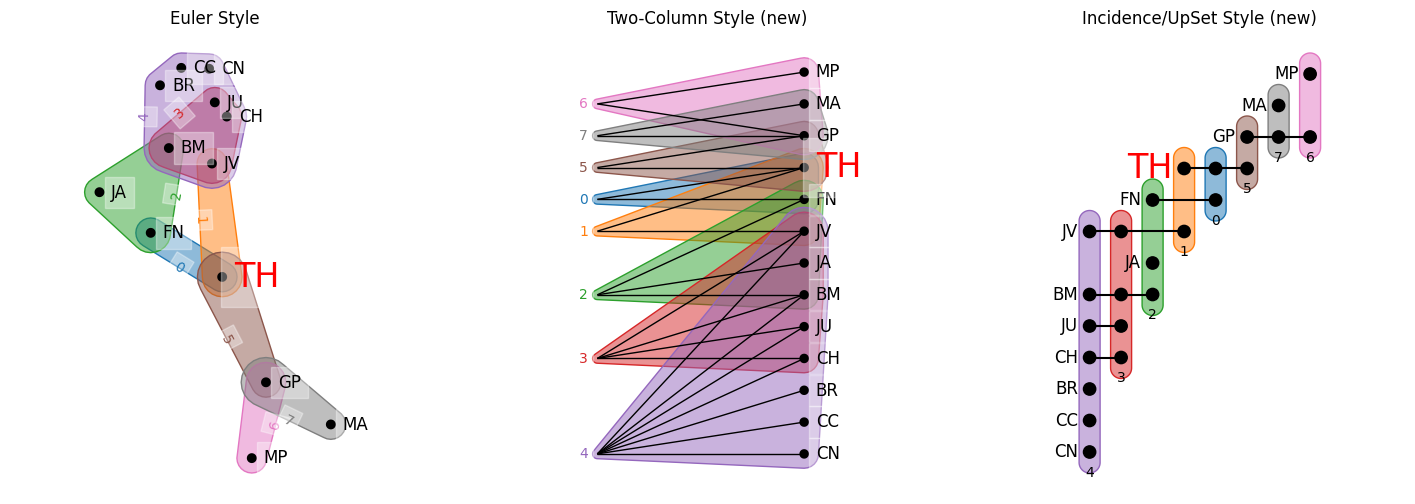

In [70]:
draw_each(H, 
    node_labels_kwargs={
        'fontsize': {
            v: 24 if v=='TH' else 12 for v in H
        },
        'color': {
            v: 'red' if v=='TH' else 'black' for v in H
        }
    })

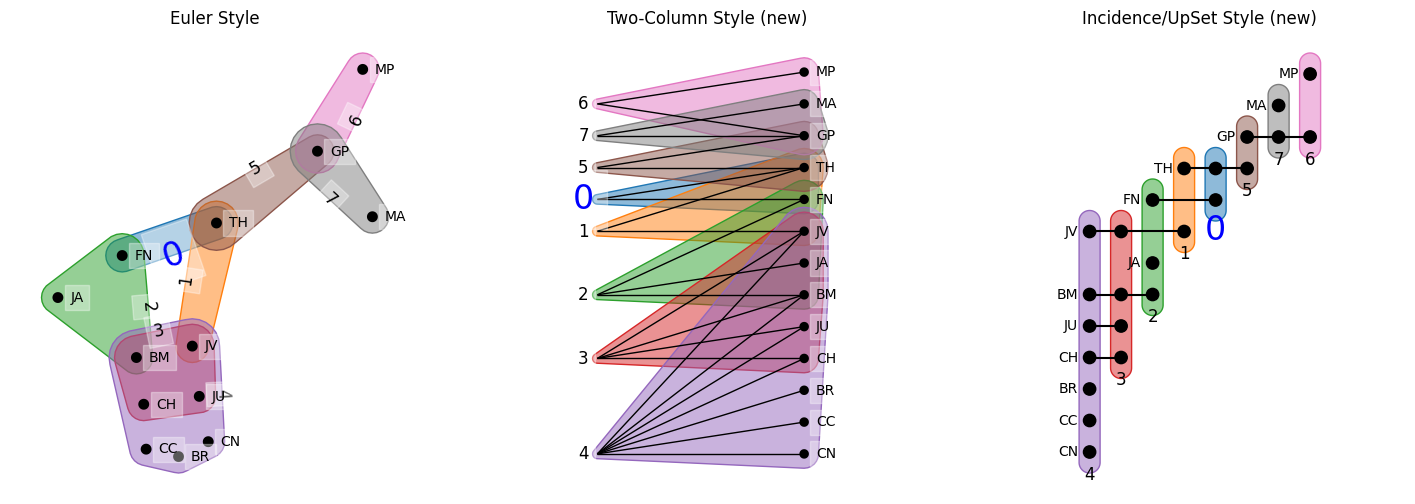

In [71]:
draw_each(H, 
    edge_labels_kwargs={
        'fontsize': {
            v: 24 if v==0 else 12 for v in H.edges()
        },
        'color': {
            v: 'blue' if v==0 else 'black' for v in H.edges()
        }
    })

### Function

ValueError: <function <lambda> at 0x140b61800> is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; string reprs of 0-1 floats for grayscale values; 'C0', 'C1', ... strings for colors of the color cycle; and pairs combining one of the above with an alpha value

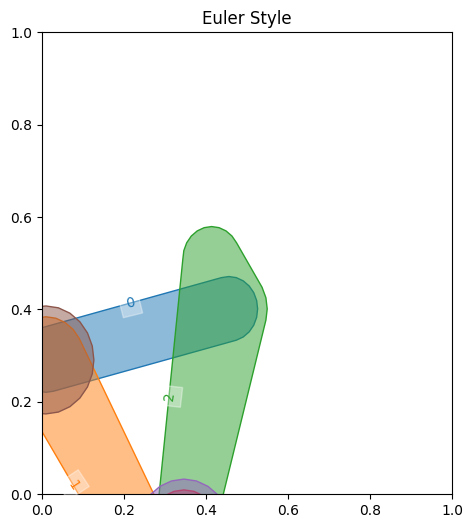

In [31]:
# Error setting node labels font color using a function?
draw_each(H, 
    node_labels_kwargs={
        'fontsize': lambda x: 20 if 'M' in x else 12,
        'color': lambda x: 'red' if 'M' in x else 'black'
    })

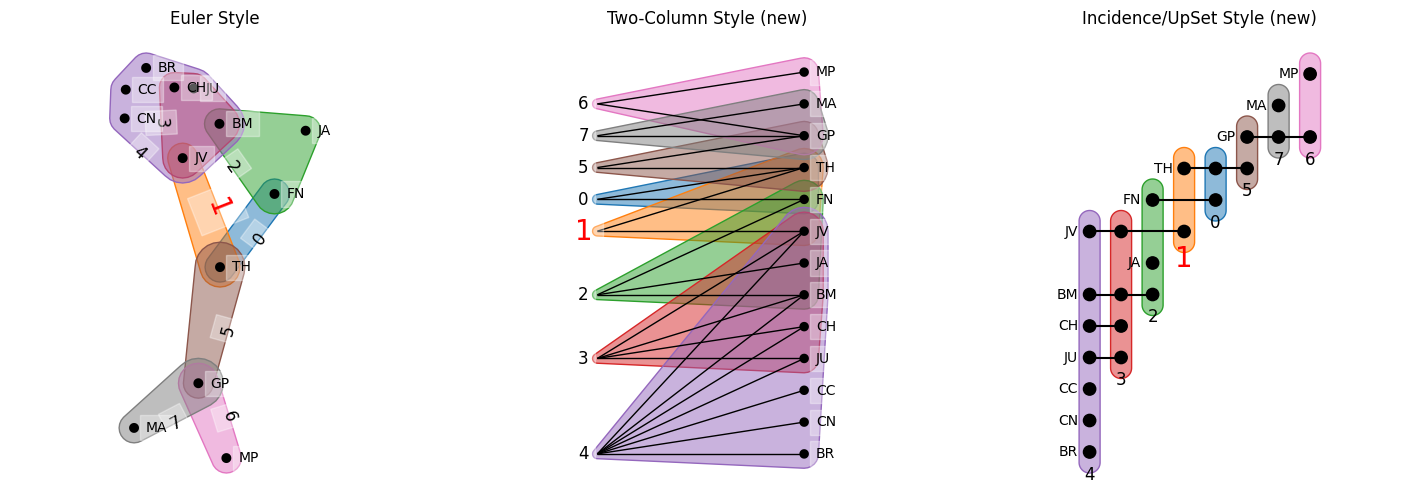

In [28]:
draw_each(H, 
    edge_labels_kwargs={
        'fontsize': lambda x: 20 if x==1 else 12,
        'color': lambda x: 'red' if x == 1 else 'black'
    })